## <font color='orange'><b>Import libraries</b></font>

In [1]:
# Import this library
from nbacktest import Backtest, Strategy

# Import other libraries
import yfinance as yf
import quantstats as qs

## <font color='orange'><b>Create Strategy</b></font>

In [2]:
class TestStrategy (Strategy):
    stock1 = "AAPL"
    stock2 = "GOOG"

    def on_start(self):

        print("Strategy started!")
        
        quantity1 = int((self.broker.balance/2)/self.close["AAPL"])
        quantity2 = int((self.broker.balance/2)/self.close["GOOG"])

        order1 = self.buy(self.stock1, quantity1)
        order2 = self.buy(self.stock2, quantity2)

        print("Bought %s AAPL and %s GOOG" % (quantity1, quantity2))


    def on_end (self):
        """"
        This function is called when the backtest of all candles is finished
        """
        print("Strategy finished!")


    def next(self):
        """"
        This function is called when the backtest of all candles is finished
        """
        #print("Backtest iteration:", self.iteration)
        pass


## <font color='orange'><b>Backtest Configuration</b></font>

In [3]:
universe = ["AAPL", "GOOG"] # List containing the tickers of all the assets you are backtesting

ohlc = yf.download(universe, interval="1d", period="5y") # OHLC Data downloaded from Yahoo Finance

ohlc.tail()


[*********************100%***********************]  2 of 2 completed


Adj Close                   Close                    High  \
                  AAPL        GOOG        AAPL        GOOG        AAPL   
Date                                                                     
2023-08-07  178.608810  131.940002  178.850006  131.940002  183.130005   
2023-08-08  179.557526  131.839996  179.800003  131.839996  180.270004   
2023-08-09  177.949707  130.149994  178.190002  130.149994  180.929993   
2023-08-10  177.729996  130.210007  177.970001  130.210007  180.750000   
2023-08-11  177.789993  130.169998  177.789993  130.169998  178.619995   

                               Low                    Open              \
                  GOOG        AAPL        GOOG        AAPL        GOOG   
Date                                                                     
2023-08-07  132.059998  177.350006  129.429993  182.130005  129.509995   
2023-08-08  131.940002  177.580002  130.130005  179.690002  130.979996   
2023-08-09  132.470001  177.009995  129.505005  180.869995  132.190002   
2023-08-10  132.647003  177.600006  130.035004  179.479996  131.970001   
2023-08-11  130.440002  176.550003  128.750000  177.320007  129.201996   

              Volume            
                AAPL      GOOG  
Date                            
2023-08-07  97576100  17621000  
2023-08-08  67823000  16836000  
2023-08-09  60378500  17745200  
2023-08-10  54686900  17855700  
2023-08-11  51988100  15191500

## <font color='orange'><b>Run Backtest</b></font>

In [4]:
bt = Backtest(data=ohlc, universe=universe, strategy=TestStrategy, cash=10_000)

result = bt.run()

print("Final equity: %.2f" % bt.broker._equity)

bt.broker.positions
bt.broker.orderbook

Strategy started!
Bought 99 AAPL and 80 GOOG
Strategy finished!
Final equity: 28123.73


,iteration,timestamp,action,ticker,quantity,price,total
id,,,,,,,
0,0,2018-08-13,buy,AAPL,99,50.010464,-4951.035908
1,0,2018-08-13,buy,GOOG,80,61.750500,-4940.039978


## <font color='orange'><b>Performance Report from QuantStats</b></font>

                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2018-08-06  2018-08-06
End Period          2023-08-03  2023-08-03
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      100.0%

Cumulative Return   195.92%     71.58%
CAGR﹪              24.26%      11.42%

Sharpe              0.88        0.61
Prob. Sharpe Ratio  97.41%      91.2%
Sortino             1.26        0.85
Sortino/√2          0.89        0.6
Omega               1.17        1.17

Max Drawdown        -34.69%     -33.72%
Longest DD Days     575         576

Gain/Pain Ratio     0.17        0.12
Gain/Pain (1M)      0.97        0.64

Payoff Ratio        0.93        0.9
Profit Factor       1.17        1.12
Common Sense Ratio  1.15        1.02
CPC Index           0.6         0.55
Tail Ratio          0.98        0.91
Outlier Win Ratio   3.19        4.85
Outlier Loss Ratio  3.07        4.61

MTD                 -2.89%      -1.96%
3M                  16.23%      9.66%

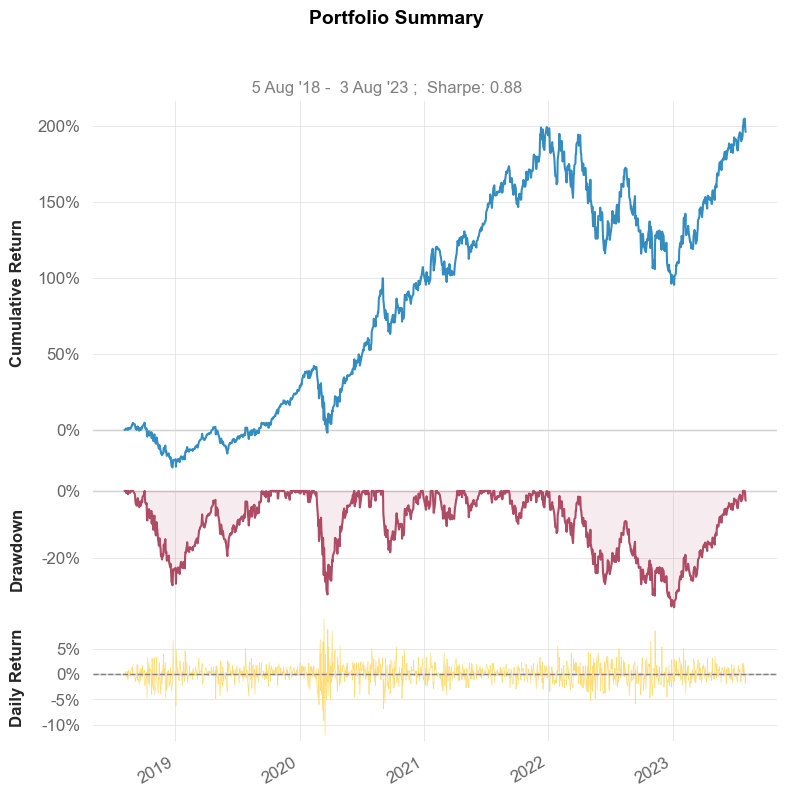

c:\Users\nineb\anaconda3\envs\quant\lib\site-packages\quantstats\stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


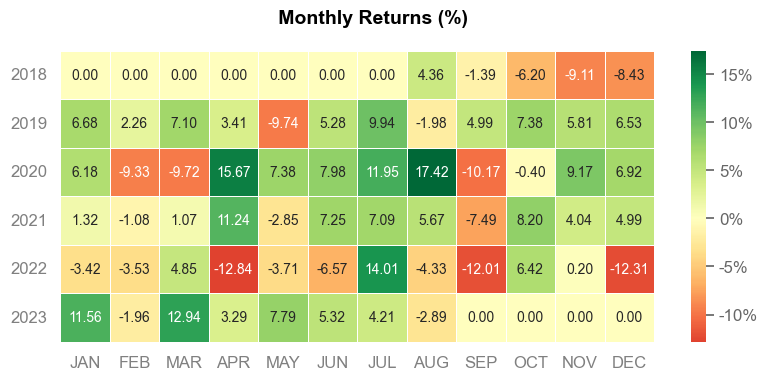

In [41]:
qs.reports.basic(returns=result["Equity"], benchmark="SPY", rf=0.00)
#qs.reports.html(returns=result["Equity"], benchmark="SPY", rf=0.00, title="TestStrategy")